# 01. Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Import data

In [3]:
# Import data
df_merged = pd.read_pickle(r'C:\Users\kasia\Desktop\Career Foundry\Achievement 4\06-2024 Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_customers.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kasia\\Desktop\\Career Foundry\\Achievement 4\\06-2024 Instacart Basket Analysis\\02 Data\\Prepared Data\\ords_prods_customers.pkl'

In [3]:
df_merged.head()

,user_id,gender,state,age,date_joined,children,fam_status,income,product_id,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spend_flag,frequent_customer,order_frequency_flag
0,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,Mid-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer
1,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer
2,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,Mid-range product,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer
3,26711,f,Missouri,48,1/1/2017,3,m,165665,6184,Clementines,...,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer
4,26711,f,Missouri,48,1/1/2017,3,m,165665,6184,Clementines,...,Low-range product,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer


# Task 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

I've deleted the columns with name and surname of the customers as it wasn't advantageable for the analysis, in this case there is no PII data in the report.

# Task 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [11]:
# State to Region mapping
state_to_region = {
    # Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast', 'Massachusetts': 'Northeast',
    'Rhode Island': 'Northeast', 'Connecticut': 'Northeast', 'New York': 'Northeast', 'Pennsylvania': 'Northeast',
    'New Jersey': 'Northeast',
    
    # Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'North Dakota': 'Midwest', 'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest', 'Minnesota': 'Midwest',
    'Iowa': 'Midwest', 'Missouri': 'Midwest',
    
    # South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South', 'Virginia': 'South', 'West Virginia': 'South',
    'North Carolina': 'South', 'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South', 'Kentucky': 'South',
    'Tennessee': 'South', 'Mississippi': 'South', 'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arkansas': 'South', 'Louisiana': 'South',
    
    # West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West', 'Utah': 'West', 'Colorado': 'West',
    'Arizona': 'West', 'New Mexico': 'West', 'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West', 'California': 'West',
    'Hawaii': 'West'
}

In [12]:
# Create 'region' column
df_merged['region'] = df_merged['state'].map(state_to_region)

In [13]:
# Check the output
df_merged.head()

,user_id,gender,state,age,date_joined,children,fam_status,income,product_id,product_name,...,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spend_flag,frequent_customer,order_frequency_flag,region
0,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest
1,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest
2,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,Regularly busy,Busiest days,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest
3,26711,f,Missouri,48,1/1/2017,3,m,165665,6184,Clementines,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest
4,26711,f,Missouri,48,1/1/2017,3,m,165665,6184,Clementines,...,Regularly busy,Regularly busy,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest


In [14]:
# Create a crosstab between 'region' and 'spend_flag'
region_spend_flag = pd.crosstab(df_merged['region'], df_merged['spend_flag'], dropna = False)

In [15]:
region_spend_flag

spend_flag,High_spender,Low_spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


From the figures above, it is evident that both high spender and low spender populations are substantial in the South region, also there is to notice the biggest discrepency between the low and high spenders. The lowest amount of both high and low spenders is visible in the Northeast, the fact could lead to a conclusion that the client base is lowest in that region.

# Task 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [21]:
# Create exlusion flag for low activity customers
df_merged.loc[df_merged['max_order'] < 5, 'activity_flag'] = 'low'
df_merged.loc[df_merged['max_order'] >= 5, 'activity_flag'] = 'high'

In [22]:
df_merged.head()

,user_id,gender,state,age,date_joined,children,fam_status,income,product_id,product_name,...,busiest_period_of_day,max_order,loyalty_flag,average_price,spend_flag,frequent_customer,order_frequency_flag,region,exclusion_flag,activity_flag
0,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high
1,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high
2,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high
3,26711,f,Missouri,48,1/1/2017,3,m,165665,6184,Clementines,...,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high
4,26711,f,Missouri,48,1/1/2017,3,m,165665,6184,Clementines,...,Most orders,8,New customer,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high


In [23]:
# Check the frequency
df_merged['activity_flag'].value_counts(dropna = False)

activity_flag
high    30964564
low      1440295
Name: count, dtype: int64

In [24]:
#Creating sample with low activity customers
df_low_activity = df_merged[df_merged['activity_flag'] =='low']

In [25]:
#Creating sample with high activity customers
df_active = df_merged[df_merged['activity_flag'] =='high']

In [11]:
path = r'C:\Users\kasia\Desktop\Career Foundry\Achievement 4\06-2024 Instacart Basket Analysis'

In [33]:
# Export data
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [34]:
df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

In [30]:
df_active.shape

(30964564, 30)

# Task 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. Task 6. Create an appropriate visualization to show the distribution of profiles.

In [3]:
# Import data
df_final = pd.read_pickle(r'C:\Users\kasia\Desktop\Career Foundry\Achievement 4\06-2024 Instacart Basket Analysis\02 Data\Prepared Data\high_activity_customers.pkl')

Profiling a customer

In [3]:
df_final.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'children',
       'fam_status', 'income', 'product_id', 'product_name', 'department_id',
       'prices', 'order_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'price_range_loc',
       'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'average_price', 'spend_flag', 'frequent_customer',
       'order_frequency_flag', 'region', 'exclusion_flag', 'activity_flag'],
      dtype='object')

In [15]:
# Age categorization
df_final.loc[df_final['age'] <= 30, 'age_group'] = 'Young Adult'
df_final.loc[(df_final['age'] > 30) & (df_final['age'] < 60), 'age_group'] = 'Middle-aged Adult'
df_final.loc[df_final['age'] >= 60, 'age_group'] = 'Senior'

In [6]:
# Check output
df_final.age_group

0           Middle-aged Adult
1           Middle-aged Adult
2           Middle-aged Adult
3           Middle-aged Adult
4           Middle-aged Adult
                  ...        
32404813               Senior
32404814               Senior
32404815               Senior
32404816               Senior
32404817               Senior
Name: age_group, Length: 30964564, dtype: object

In [5]:
# Frequency check
df_final['age_group'].value_counts(dropna = False)

age_group
Middle-aged Adult    14085820
Senior               10574504
Young Adult           6304240
Name: count, dtype: int64

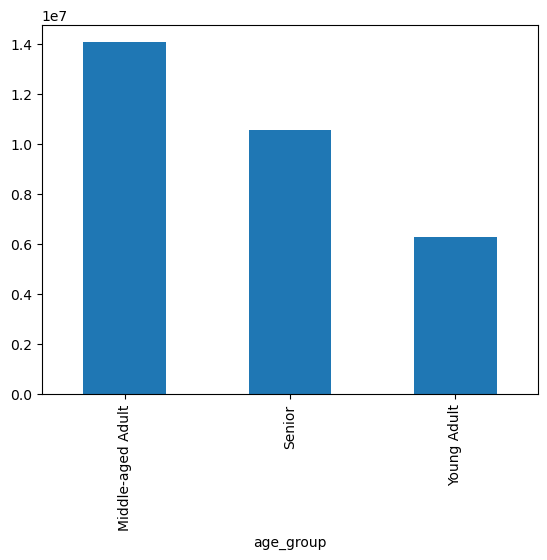

In [22]:
bar_age_group = df_final['age_group'].value_counts().plot.bar()

In [31]:
path = r'C:\Users\kasia\Desktop\Career Foundry\Achievement 4\06-2024 Instacart Basket Analysis'

In [25]:
# Export image
bar_age_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_group.png'))

In [4]:
# Income categorization
df_final.loc[df_final['income'] <= 50000, 'income_group'] = 'Low Income'
df_final.loc[(df_final['income'] > 50000) & (df_final['income'] < 150000), 'income_group'] = 'Mid Income'
df_final.loc[df_final['income'] >= 150000, 'income_group'] = 'High Income'

In [9]:
# Frequency check
df_final['income_group'].value_counts(dropna = False)

income_group
Mid Income     23706735
High Income     3895275
Low Income      3362554
Name: count, dtype: int64

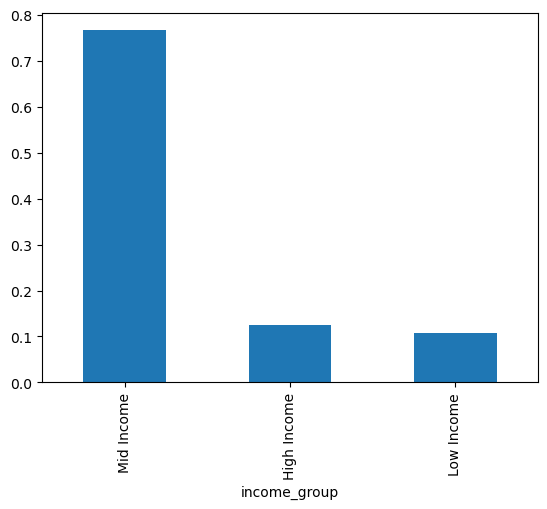

In [9]:
bar_income_group = df_final['income_group'].value_counts(normalize=True).plot.bar()

In [7]:
bar_income_group

income_group
Mid Income     0.765609
High Income    0.125798
Low Income     0.108594
Name: proportion, dtype: float64

In [28]:
# Export image
bar_income_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_group.png'))

In [5]:
# Children categorization
df_final.loc[df_final['children'] == 0, 'children_group'] = 'Single/Married with no children'
df_final.loc[(df_final['children'] <= 2) & (df_final['children'] < 3), 'children_group'] = 'Small Family'
df_final.loc[df_final['children'] >= 3, 'children_group'] = 'Large Family'

In [6]:
# Children categorization new
df_final.loc[df_final['children'] == 0, 'children_group'] = 'Single/Married with no children'
df_final.loc[(df_final['children'] > 0) & (df_final['children'] <= 2), 'children_group'] = 'Small Family'
df_final.loc[df_final['children'] >= 3, 'children_group'] = 'Large Family'

In [20]:
# Frequency check
df_final['children_group'].value_counts(dropna = False)

children_group
Small Family                       15452367
Large Family                        7772516
Single/Married with no children     7739681
Name: count, dtype: int64

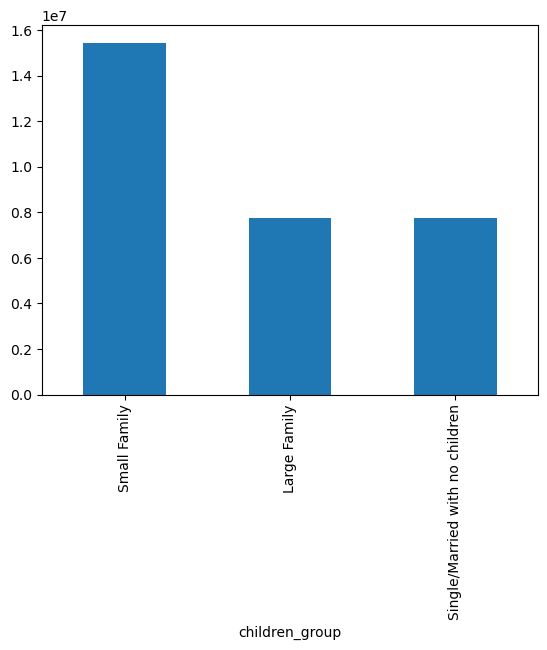

In [9]:
bar_children_group = df_final['children_group'].value_counts().plot.bar()

In [12]:
# Export image
bar_children_group.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_children_group.png'))

In [12]:
df_final.head()

,user_id,gender,state,age,date_joined,children,fam_status,income,product_id,product_name,...,average_price,spend_flag,frequent_customer,order_frequency_flag,region,exclusion_flag,activity_flag,age_group,income_group,children_group
0,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high,Middle-aged Adult,High Income,Large Family
1,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high,Middle-aged Adult,High Income,Large Family
2,26711,f,Missouri,48,1/1/2017,3,m,165665,196,Soda,...,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high,Middle-aged Adult,High Income,Large Family
3,26711,f,Missouri,48,1/1/2017,3,m,165665,6184,Clementines,...,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high,Middle-aged Adult,High Income,Large Family
4,26711,f,Missouri,48,1/1/2017,3,m,165665,6184,Clementines,...,7.988889,Low_spender,19.0,Regular customer,Midwest,Include,high,Middle-aged Adult,High Income,Large Family


# Task 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [17]:
# Create aggregated subset of data where the 'prices' column is the total cost of each order:
orders_profile = df_final.groupby(['user_id', 'age_group', 'income_group', 'children_group', 'order_frequency_flag', 
                                    'region', 'days_since_prior_order'])['prices'].sum().reset_index()

In [18]:
# Check the subset
orders_profile

,user_id,age_group,income_group,children_group,order_frequency_flag,region,days_since_prior_order,prices
0,1,Middle-aged Adult,Low Income,Large Family,Non_frequent_customer,South,0.0,40.200001
1,1,Middle-aged Adult,Low Income,Large Family,Non_frequent_customer,South,14.0,40.200001
2,1,Middle-aged Adult,Low Income,Large Family,Non_frequent_customer,South,15.0,35.400002
3,1,Middle-aged Adult,Low Income,Large Family,Non_frequent_customer,South,19.0,25.000000
4,1,Middle-aged Adult,Low Income,Large Family,Non_frequent_customer,South,20.0,29.000000
...,...,...,...,...,...,...,...,...
1395828,206209,Senior,Mid Income,Large Family,Non_frequent_customer,Midwest,9.0,77.099998
1395829,206209,Senior,Mid Income,Large Family,Non_frequent_customer,Midwest,18.0,131.500000
1395830,206209,Senior,Mid Income,Large Family,Non_frequent_customer,Midwest,22.0,101.400002
1395831,206209,Senior,Mid Income,Large Family,Non_frequent_customer,Midwest,29.0,64.699997


In [35]:
# Create crosstab using age_group and order_frequency_flag
crosstab_age_frequency = pd.crosstab(df_final['age_group'], df_final['order_frequency_flag'], dropna = False)

In [36]:
crosstab_age_frequency

order_frequency_flag,Frequent Customer,Non_frequent_customer,Regular customer
age_group,,,
Middle-aged Adult,9634562,1316179,3135079
Senior,7252218,990538,2331748
Young Adult,4317696,588258,1398286


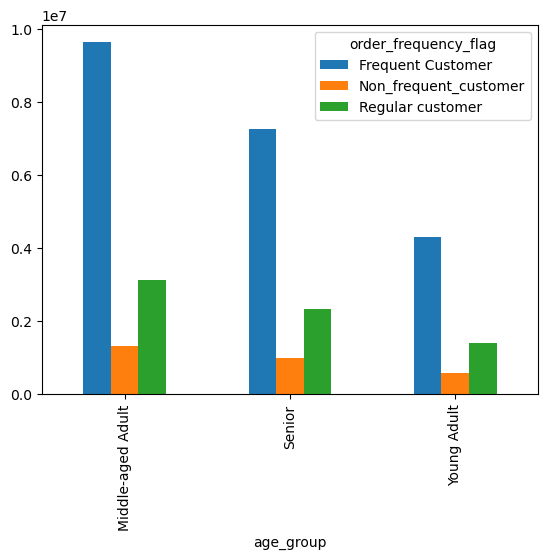

In [37]:
Bar_age_frequency = crosstab_age_frequency.plot(kind = 'bar')

In [39]:
Bar_age_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_by_age.png'), bbox_inches = 'tight')

In [41]:
# Calculating max, min, mean by age category
aggregations_age = orders_profile.groupby('age_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'], 
                                                                  'prices' : ['min', 'mean', 'max']})
# Checking aggregation results
aggregations_age

days_since_prior_order                  prices              \
                                     min       mean   max    min        mean   
age_group                                                                      
Middle-aged Adult                    0.0  12.599730  30.0    1.0  253.188812   
Senior                               0.0  12.593723  30.0    1.0  245.134613   
Young Adult                          0.0  12.608637  30.0    1.0  253.445267   

                                 
                            max  
age_group                        
Middle-aged Adult  401483.18750  
Senior             301339.90625  
Young Adult        500599.18750

Aggregation by income_group

In [43]:
# max, min, mean by age category
aggregations_income = orders_profile.groupby('income_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'prices' : ['min', 'mean', 'max']})
# Checking aggregation results
aggregations_income

days_since_prior_order                  prices              \
                                min       mean   max    min        mean   
income_group                                                              
High Income                     0.0  12.443160  30.0    1.0  724.028198   
Low Income                      0.0  13.018041  30.0    1.0  105.499855   
Mid Income                      0.0  12.542773  30.0    1.0  202.316956   

                             
                        max  
income_group                 
High Income   500599.187500  
Low Income      8045.399902  
Mid Income    400705.718750

Aggregation by children_group

In [19]:
# max, min, mean by age category
aggregations_household = orders_profile.groupby('children_group').agg({'days_since_prior_order' : ['min', 'mean', 'max'],
                                                                        'prices' : ['min', 'mean', 'max']})
# Checking aggregation results
aggregations_household

days_since_prior_order                   \
                                                   min       mean   max   
children_group                                                            
Large Family                                       0.0  12.594584  30.0   
Single/Married with no children                    0.0  12.606233  30.0   
Small Family                                       0.0  12.598550  30.0   

                                prices                            
                                   min        mean           max  
children_group                                                    
Large Family                       1.0  246.477051  500599.18750  
Single/Married with no children    1.0  253.620911  400705.71875  
Small Family                       1.0  250.915573  401483.18750

# Task 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [45]:
#Import dataframe

df_departments=pd.read_csv(os.path.join(path,path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [46]:
# Check dataframe
df_departments

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [47]:
#Rename unnamed column to department_id
df_departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [48]:
df_departments.head(2)

,department_id,department
0,1,frozen
1,2,other


In [49]:
# Merge the departments data with df_final using department_id as a key
df_final_dep = df_final.merge(df_departments, on = 'department_id', indicator = 'merge1')

MemoryError: Unable to allocate 4.15 GiB for an array with shape (18, 30964564) and data type object